In [157]:
from bs4 import BeautifulSoup
import requests
from slugify import slugify
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np

import ipywidgets as widgets
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


In [158]:
BASE_URL = "https://www.sahibinden.com/"

In [159]:
def get_html(url):
    response = requests.get(url, headers={"User-Agent": "Mozilla/5.0","accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9"})
    return response.content
base_page = get_html("{}{}".format(BASE_URL,"otomobil"))

In [160]:
soup = BeautifulSoup(base_page, "html.parser")

In [161]:
brands = soup.find_all("li", {"class": "cl2"})

In [162]:
def clear_raw_data(data):
    dataList = []
    for tag in data:
        brand = tag.text.strip().split("(")[0].strip() 
        brand = slugify(brand)

        dataList.append(brand)
    return dataList

    

In [163]:
brandList = clear_raw_data(brands)

In [164]:
chosenBrand = widgets.Dropdown(
    options=brandList,
    description='Brand:',
    disabled=False,
)
chosenBrand

Dropdown(description='Brand:', options=('acura', 'aion', 'alfa-romeo', 'anadol', 'aston-martin', 'audi', 'bent…

In [165]:
MODELS_URL = BASE_URL + chosenBrand.value

In [166]:
modelsPage = get_html(MODELS_URL)

In [167]:
models = BeautifulSoup(modelsPage, "html.parser")
models = models.find_all("li", {"class": "cl3"})
models = clear_raw_data(models)
models = np.unique(models)

In [168]:
chosenModel = widgets.Dropdown(
    options=models,
    description='Number:',
    disabled=False,
)
chosenModel

/Users/berkkan/opt/anaconda3/lib/python3.9/site-packages/traitlets/traitlets.py:588: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  silent = bool(old_value == new_value)


Dropdown(description='Number:', options=('145', '146', '147', '155', '156', '159', '164', '166', '33', 'brera'…

In [174]:
def clean_sahibinden_table(table):
    usefulContentDF = table.dropna(axis=0, how="all")
    usefulContentDF = usefulContentDF[["Yıl", "KM", "Fiyat","Model"]]
    usefulContentDF['KM'] = (usefulContentDF['KM']*1000).astype(int)
    usefulContentDF['Fiyat'] = usefulContentDF['Fiyat'].str.replace(" TL", "")
    usefulContentDF['Fiyat'] = usefulContentDF['Fiyat'].str.replace(".", "").astype(int)
    return usefulContentDF

In [179]:
df = pd.DataFrame(columns=["Yıl", "KM", "Fiyat","Model"], dtype=int)

In [180]:
for offset in range(0, 700, 50):
    print(offset)
    QUERY_PARAM = "?pagingOffset={}&pagingSize=50&sorting=date_desc".format(offset)
    QUERY_URL = MODELS_URL + "-" + chosenModel.value + QUERY_PARAM

    content = get_html(QUERY_URL)
    content = BeautifulSoup(content, "html.parser")
    content = content.find("table", {"id": "searchResultsTable"})
    contentDF = pd.read_html(str(content))[0]
    df = df.append(contentDF, ignore_index=True)

    
df


0


/var/folders/7k/r54zsyhd639_44dxvy8hkzj40000gn/T/ipykernel_1153/2924686753.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(contentDF, ignore_index=True)


50


/var/folders/7k/r54zsyhd639_44dxvy8hkzj40000gn/T/ipykernel_1153/2924686753.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(contentDF, ignore_index=True)


100


ImportError: html5lib not found, please install it

In [182]:
df

,Yıl,KM,Fiyat,Model,Unnamed: 0,İlan Başlığı,Renk,İlan Tarihi,İl / İlçe,Unnamed: 9
0,2007.0,316.0,347.500 TL,2.4 JTD Distinctive,NaN,HIZ TUTKUSU OLANLARA ÖZEL YER UÇAĞI,Siyah,26 Aralık 2022,KocaeliKörfez,NaN
1,2009.0,242.0,315.000 TL,1.8 Distinctive,NaN,Türkiyedeki en temiz sunroof'lu 1.8 MPİ,Siyah,25 Aralık 2022,İstanbulPendik,NaN
2,2011.0,185.0,500.500 TL,1.9 JTD Distinctive Plus,NaN,ERK AUTO RUHUMUZ OLMADAN SADECE BIRER MAKINEYI...,Beyaz,25 Aralık 2022,AnkaraYenimahalle,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006.0,127.0,315.000 TL,1.9 JTS Distinctive,NaN,VELOCE'DEN EMSALSİZ TEMİZLİKTE ORJİNAL 127.000...,Gümüş Gri,24 Aralık 2022,İstanbulKadıköy,NaN
...,...,...,...,...,...,...,...,...,...,...
68,2007.0,292.0,284.000 TL,1.9 JTD Distinctive Plus,NaN,2007 ALFA 159 Distincive Plus Q-Tronic +DERİ K...,Siyah,27 Kasım 2022,KütahyaMerkez,NaN
69,2008.0,249.0,330.500 TL,1.9 JTD Distinctive Plus,NaN,Masrafsız 150 hp 1.9 JTD Sahibinden Bol Ekstra...,Gri,26 Kasım 2022,İzmirDikili,NaN
70,2010.0,385.0,375.000 TL,1.9 JTD Distinctive Plus,NaN,TATOĞLU OTOMOTİV'DEN ALFA ROMEO,Beyaz,26 Kasım 2022,KocaeliGebze,NaN
71,2009.0,300.0,325.000 TL,1.9 JTD Distinctive Plus,NaN,2009 MODEL ALFA ROMEO 159 DİZEL OTOMATİK SUNRU...,Siyah,26 Kasım 2022,NevşehirMerkez,NaN


In [183]:
contentDF = clean_sahibinden_table(df)
contentDF

/var/folders/7k/r54zsyhd639_44dxvy8hkzj40000gn/T/ipykernel_1153/3113079336.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  usefulContentDF['Fiyat'] = usefulContentDF['Fiyat'].str.replace(".", "").astype(int)


,Yıl,KM,Fiyat,Model
0,2007.0,316000,347500,2.4 JTD Distinctive
1,2009.0,242000,315000,1.8 Distinctive
2,2011.0,185000,500500,1.9 JTD Distinctive Plus
4,2006.0,127000,315000,1.9 JTS Distinctive
5,2008.0,287000,305000,1.9 JTD Distinctive
...,...,...,...,...
68,2007.0,292000,284000,1.9 JTD Distinctive Plus
69,2008.0,249000,330500,1.9 JTD Distinctive Plus
70,2010.0,385000,375000,1.9 JTD Distinctive Plus
71,2009.0,300000,325000,1.9 JTD Distinctive Plus


In [134]:
enc = OneHotEncoder()
enc_df = pd.DataFrame(enc.fit_transform(df[['Model']]).toarray(), columns=enc.get_feature_names(['Model']))

/Users/berkkan/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [135]:
final_df = df.join(enc_df)
final_df

,Yıl,KM,Fiyat,Model,Model_1.0 EcoTSI Ecomotive Style,Model_1.0 EcoTSI Style Visio,Model_1.0 TSI Style,Model_1.0 eTSI Style Plus,Model_1.2 TSI Style,Model_1.4 EcoTSI FR,...,Model_1.6 TDI SC Style,Model_1.6 TDI ST Style,Model_1.6 TDI Style,Model_1.6 TDI X-Perience,Model_1.6 TDI Xcellence,Model_1.9 TDI Signo,Model_1.9 TDI Sport,Model_2.0 TDI CR FR,Model_2.0 TFSI Cupra,Model_2.0 TSI Cupra
0,2016.0,102797,578000,1.4 TSI FR,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2009.0,152500,475000,2.0 TFSI Cupra,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2012.0,129000,390000,1.4 TSI Copa Plus,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2014.0,220000,369000,1.6 TDI CR Style,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016.0,93000,549000,1.2 TSI Style,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,2012.0,158000,375000,1.6 TDI CR Style,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
703,2013.0,225000,480000,1.6 TDI CR Style,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
704,2015.0,131000,575000,1.6 TDI X-Perience,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
705,2020.0,47000,815000,1.5 EcoTSI FR,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
def build_model(X_train, y_train,model):
    if model == "linear":
        model = LinearRegression()
    if model == "svm":
        model = SVR(gamma='scale', C=100000.0, epsilon=0.2)
    if model == "randomforest":
        model = RandomForestRegressor()
    model.fit(X_train, y_train)

    return model

In [137]:
X = final_df.drop(["Fiyat","Model"], axis=1)
y = final_df["Fiyat"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
linear_model = build_model(X_train, y_train, "linear")

linear_model.score(X_test, y_test)

0.8910669762545633

In [139]:
y_pred = linear_model.predict(X_test)

In [140]:
def plot_prediction(y_test, y_pred):
    plt.figure(figsize=(12, 7))
    plt.scatter(y_pred, y_test, alpha=0.4)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Predicted vs Actual")
    maxValue = max(y_test.max(), y_pred.max())
    minValue = min(y_test.min(), y_pred.min())
    plt.plot([minValue, maxValue], [minValue, maxValue], color='red')
    plt.show()

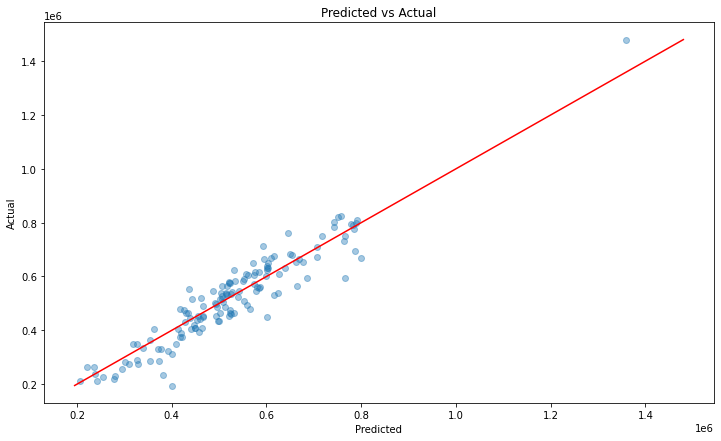

In [141]:
plot_prediction(y_test, y_pred)

In [142]:
svm_model = build_model(X_train, y_train, "svm")

svm_model.score(X_test, y_test)

0.5928644882625638

In [143]:
y_pred = svm_model.predict(X_test)

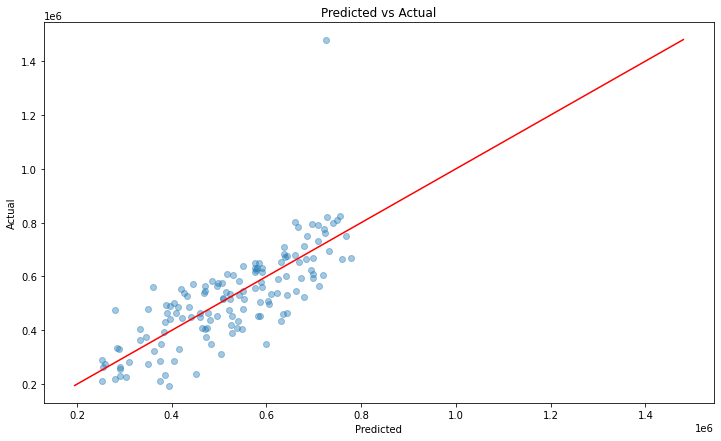

In [144]:
plot_prediction(y_test, y_pred)

In [145]:
randomforest_model = build_model(X_train, y_train, "randomforest")

randomforest_model.score(X_test, y_test)

0.8358073017512907

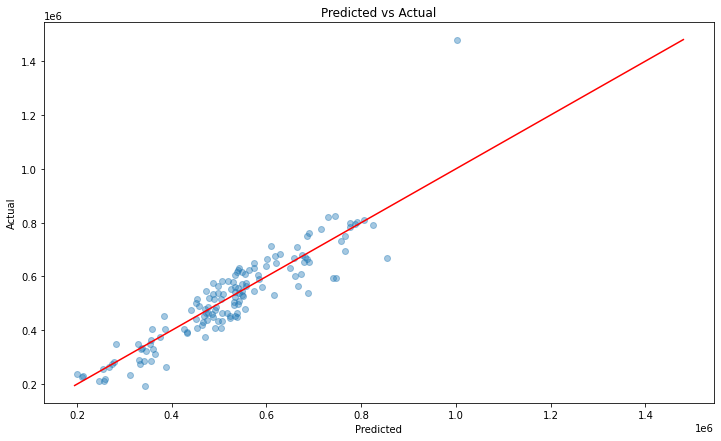

In [146]:
y_pred = randomforest_model.predict(X_test)
plot_prediction(y_test, y_pred)

In [147]:
spesificModels = df["Model"].unique()
spesificModels.sort()

In [148]:
selectedModel = widgets.Dropdown(
    options=spesificModels,
    description='Number:',
    disabled=False,
)
selectedModel

Dropdown(description='Number:', options=('1.0 EcoTSI Ecomotive Style', '1.0 EcoTSI Style Visio', '1.0 TSI Styl…

In [149]:
spesificModelsDF = pd.DataFrame(columns=spesificModels, dtype=int)
spesificModelsDF.loc[0, selectedModel.value] = 1
spesificModelsDF.fillna(0, inplace=True)
spesificModelsDF

,1.0 EcoTSI Ecomotive Style,1.0 EcoTSI Style Visio,1.0 TSI Style,1.0 eTSI Style Plus,1.2 TSI Style,1.4 EcoTSI FR,1.4 EcoTSI Xcellence,1.4 TSI Copa Plus,1.4 TSI FR,1.4 TSI Stylance,...,1.6 TDI SC Style,1.6 TDI ST Style,1.6 TDI Style,1.6 TDI X-Perience,1.6 TDI Xcellence,1.9 TDI Signo,1.9 TDI Sport,2.0 TDI CR FR,2.0 TFSI Cupra,2.0 TSI Cupra
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
year = widgets.BoundedIntText(
    value=2022,
    min=1950,
    max=2022,
    step=1,
    description='Year:',
    disabled=False
)
year

BoundedIntText(value=2022, description='Year:', max=2022, min=1950)

In [151]:
km = widgets.IntSlider(
    value=0,
    min=0,
    max=1000000,
    step=1000,
    description='KM:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)
km

IntSlider(value=0, continuous_update=False, description='KM:', max=1000000, step=1000)

In [155]:
print(linear_model.predict([[year.value, km.value, *spesificModelsDF.values[0]]]))

[759774.53531621]


/Users/berkkan/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
